In [1]:
import os
os.environ['DISPLAY'] = ':0.0'

import random
import h5py
import numpy as np
from tqdm import tqdm
from PIL import Image
from pathlib import Path

import GFG
from GFG import Ctx
from GFG.model import Nf
from GFG.identity import IDModel
from GFG.core import Camera
from ogbGL.utils import imresize
from generate_backgrounds import phase_scramble_image

In [ ]:
### Preliminary settings
IDM_PATH = '/analyse/Project0294/GFG_data/model_HDB_linear_v2dense_compact.mat'
idm = IDModel.load(IDM_PATH)
tdet = np.load('/analyse/Project0294/GFG_data/tdet.npy')
base_nf = Nf.from_default()

In [13]:
### Set up context
# Setup openGL context + camera
ctx = Ctx(hidden=True)

# To init a camera, a model should exist, so using base_nf
base_nf.attach(ctx)
ctx._camera[0] = Camera(
    ctx.win, (112, 112), 4.,
    target=[-11.5644, -13.0381, 0],
    eye = [-11.5644, -13.0381, 250],
    up = [0, 1, 0],
    FOV = 50,
    near = 100.,
    far = 1000.
)
ctx.assign_camera(0)

# base_nf.detach()  # not necessary anymore

# # Set custom lights with only a single source
# light_source = '../../data/lights.yaml'
# ctx.set_lights(Path(light_source))

# # ID params
# gend = 'M'
# ethn = 'WC'
# age = 25
# shape_coeff = np.random.normal(0, 1, size=len(idm)).astype(np.float16)
# tex_coeff = np.random.normal(0, 1, size=(idm.nbands, len(idm))).astype(np.float16)

# nf = idm.generate(shape_coeff, tex_coeff, ethnicity=ethn, gender=gend, age=age,
#                     basenf=base_nf, tdet=tdet)
# nf.attach(ctx)  # attach to openGL context

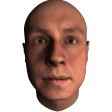

In [18]:
# Render + alpha blend img & background
base_nf.transform_model(0, 0, 0, [0, 0, 0], order='txyz', replace=False)
img = ctx.render(dest='image')
img